## Test Stable Diffusion VAE

### Encode

Load pretrained model

In [2]:
from diffusers import AutoencoderKL

# see https://github.com/huggingface/diffusers/blob/main/src/diffusers/models/autoencoders/autoencoder_kl.py
# and https://huggingface.co/docs/diffusers/api/models/autoencoderkl
vae = AutoencoderKL.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="vae")
print(vae.device)

cpu


Load data

In [4]:
import h5py
import numpy as np
import torch

def get_path(model_sim, ws):
    if model_sim == "p21c":
        dp = f"/users/jsolt/data/jsolt/21cmFAST_sims/p21c14/p21c14_subdiv_sliced_ws{ws}.hdf5"
    elif model_sim == "zreion":
        dp = f"/users/jsolt/data/jsolt/zreion_sims/zreion24/zreion24_subdiv_sliced_ws{ws}.hdf5"
    elif model_sim == "ctrpx":
        dp = f"/users/jsolt/data/jsolt/centralpix_sims/centralpix05/centralpix05_subdiv_sliced_ws{ws}.hdf5"
    return dp

sim = "ctrpx"
ws = 0.0
n = 8
z=15
path = get_path(sim, ws)
with h5py.File(path, 'r') as f:
    x = f['lightcones/brightness_temp'][n,z]
    
x = np.repeat(x[np.newaxis,:,:], 3, axis=0)
x = torch.from_numpy(x[np.newaxis,:,:,:])
print(x.shape)

torch.Size([1, 3, 256, 256])


In [5]:
import matplotlib.pyplot as plt

inpt_img = x[0].detach().numpy()
inpt_img = np.mean(inpt_img, axis=0)
plt.imshow(inpt_img)
plt.show()
plt.clf()

In [6]:
z = vae.encode(x)

In [7]:
print(z.latent_dist.__dict__.keys())
print(z.latent_dist.parameters.shape)
print(z.latent_dist.mean.shape)
print(z.latent_dist.logvar.shape)
print(z.latent_dist.deterministic)
print(z.latent_dist.std.shape)
print(z.latent_dist.var.shape)




dict_keys(['parameters', 'mean', 'logvar', 'deterministic', 'std', 'var'])
torch.Size([1, 8, 32, 32])
torch.Size([1, 4, 32, 32])
torch.Size([1, 4, 32, 32])
False
torch.Size([1, 4, 32, 32])
torch.Size([1, 4, 32, 32])


In [8]:
s = z.latent_dist.mean
output = vae.decode(s)

In [9]:
outpt_img = output.sample[0].detach().numpy()
outpt_img = np.mean(outpt_img, axis=0)
plt.imshow(outpt_img)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

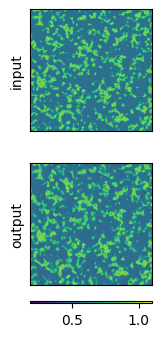

In [14]:
%matplotlib inline

import sys
sys.path.append('../util')
from plotting import plot_image_rows

rowdict = {
    'input':np.array([inpt_img,]),
    'output':np.array([outpt_img,]),
    }

plot_image_rows(rowdict)

In [ ]:
import h5py

get_name = {
    "p21c" : "p21c14",
    "zreion" : "zreion24",
    "ctrpx" : "centralpix05"
    }

get_dir = {
    "p21c" : "/users/jsolt/data/jsolt/21cmFAST_sims",
    "zreion" : "/users/jsolt/data/jsolt/zreion_sims",
    "ctrpx" : "/users/jsolt/data/jsolt/centralpix_sims"
    }

sim = 'p21c'
simname = get_name[sim]
savedir = f"{get_dir[sim]}/{simname}"
ws = 0.0
fname = f"{savedir}/{simname}_encoded_ws{ws}.hdf5"

with h5py.File(fname, "r") as f:
    enc = f['lightcones/brightness_temp'][0]

print(enc.shape)
enc = enc.reshape(30,64,64)
print(enc.shape)


(30, 4, 32, 32)
(30, 64, 64)
